In [1]:
import miRNET
import miRNET_enrichment
from matplotlib import pyplot as plt
import numpy as np

In [2]:
name = 'miR-375' #кусок имени микроРНК
miR_targets = miRNET.Targets(name)
miR_targets = miR_targets.miR_targets
#tis_gene_set = 'all'
tis_gene_set = miRNET.tissue_selector() #если нужны гены какой-то конкретной ткань, то надо выполнить эту строчку

I found a miRNA with name: hsa-miR-375
and  477 unique targets
"Human Protein Atlas"(0) or "GTEx"(1) ? 0
Gene universe is...
0 ----- adipose tissue
1 ----- adrenal gland
2 ----- appendix
3 ----- bone marrow
4 ----- breast
5 ----- bronchus
6 ----- cartilage
7 ----- caudate
8 ----- cerebellum
9 ----- cerebral cortex
10 ----- cervix, uterine
11 ----- choroid plexus
12 ----- colon
13 ----- dorsal raphe
14 ----- duodenum
15 ----- endometrium 1
16 ----- endometrium 2
17 ----- epididymis
18 ----- esophagus
19 ----- eye
20 ----- fallopian tube
21 ----- gallbladder
22 ----- hair
23 ----- heart muscle
24 ----- hippocampus
25 ----- hypothalamus
26 ----- kidney
27 ----- lactating breast
28 ----- liver
29 ----- lung
30 ----- lymph node
31 ----- nan
32 ----- nasopharynx
33 ----- oral mucosa
34 ----- ovary
35 ----- pancreas
36 ----- parathyroid gland
37 ----- pituitary gland
38 ----- placenta
39 ----- prostate
40 ----- rectum
41 ----- retina
42 ----- salivary gland
43 ----- seminal vesicle
44 ----- s

In [3]:
miR21_NET = miRNET.MainMirNetwork(G=miRNET.G, targets=miR_targets, CADgens=miRNET.CADgens, gene_set=tis_gene_set)

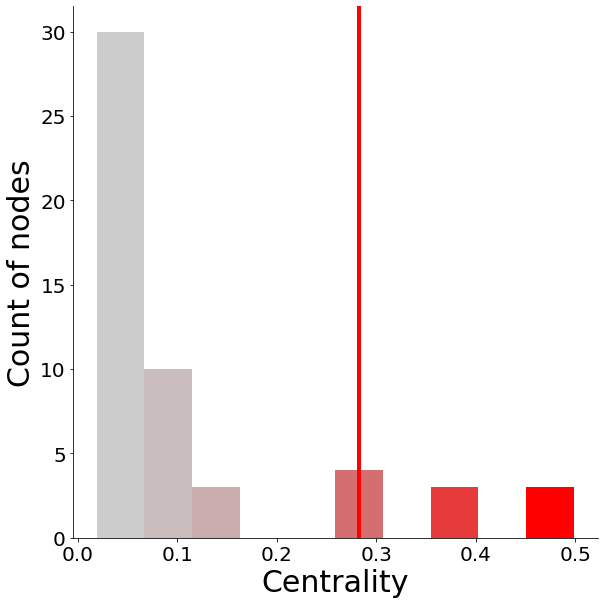

In [4]:
miRNET.draw_central_distr(miR_G=miR21_NET.LCC_miR_G,
                          key_nodes=miR21_NET.key_nodes,
                          mir_name='miR=21')

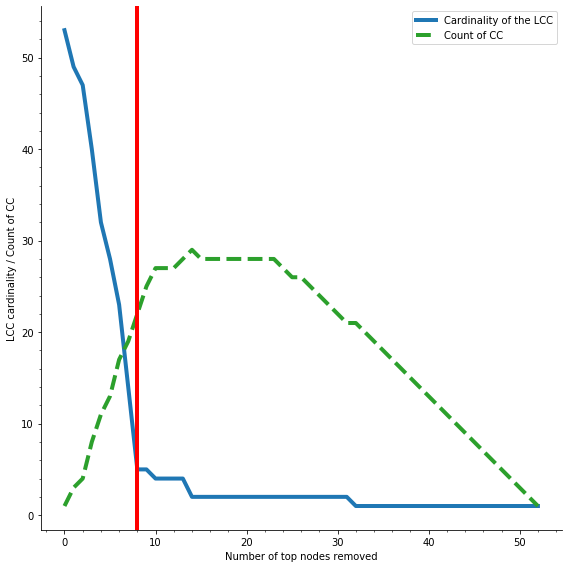

In [5]:
miRNET.draw_key_nodes_extractor(card_LCC=miR21_NET.graph_char['card_LCC'], 
                                n_CC=miR21_NET.graph_char['n_CC'], 
                                idx_max_dy=miR21_NET.graph_char['cutoff_point'], 
                                mir_name='miR21')

In [8]:
# The Cytoscape is needed to execute it

miRNET.draw_graph_to_cytoscape(miR_G=miR21_NET.LCC_miR_G, centrality_node=miR21_NET.centrality_node)

0  network components with less than two nodes have been removed


In [6]:
enrich_res = miRNET_enrichment.reactome_enrichment(miR21_NET.key_nodes.keys())

enrich_res = miRNET_enrichment.reac_pars(enrich_res)

G_enrich = miRNET_enrichment.get_net(enrich_res) #граф сигнальных путей

reactome_df = miRNET_enrichment.dendro_reactome_to_pandas(enrich_res, G_enrich)

<Figure size 432x288 with 0 Axes>

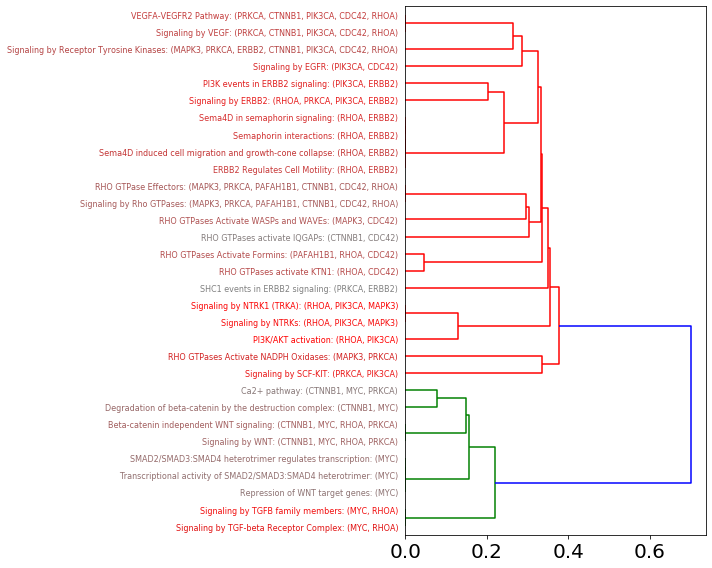

In [7]:
miRNET_enrichment.get_dendro(reactome_df, miR21_NET.key_nodes, 'miR21')